# Линейные модели, SVM и деревья решений.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
stars = pd.read_csv("star-type-classification/Stars.csv")

Загрузили датасет, содержащий данные НАСА о звездах. Датасет содержит следующие столбцы:
* Temperature - температура в Кельвинах
* L - относительная яркость
* R - относительный радиус
* A_M - абсолютная звездная величина
* Color - цвет
* Spectral_Class - спектральный класс
* Type - тип


In [3]:
stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


## Предварительная обработка

In [4]:
stars.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
oe = OrdinalEncoder()
stars[["Color", "Spectral_Class"]] = oe.fit_transform(stars[["Color", "Spectral_Class"]])
mms = MinMaxScaler()
stars[['Temperature','L','R','A_M','Color','Spectral_Class', 'Type']] = mms.fit_transform(
    stars[['Temperature','L','R','A_M','Color','Spectral_Class', 'Type']])

In [6]:
stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,0.029663,2.731275e-09,0.000083,0.876798,0.5,0.833333,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.5,0.833333,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.5,0.833333,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.5,0.833333,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.5,0.833333,0.0


Набор данных не содержит пропусков. Произвели кодирование категориальных признаков и масштабирование данных.

<Axes: >

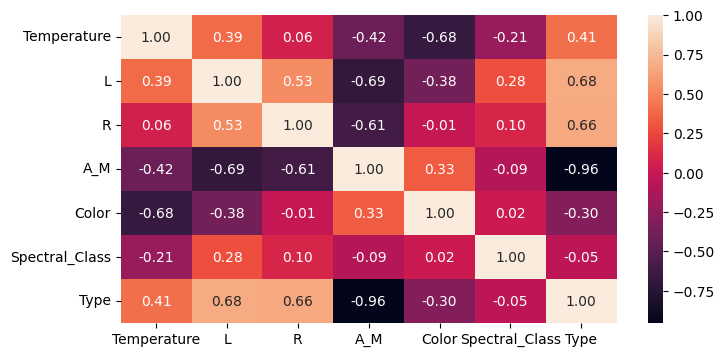

In [7]:
#Построим корреляционную матрицу
fig, ax = plt.pyplot.subplots(figsize=(8,4))
sns.heatmap(stars.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

## Разделение выборки на обучающую и тестовую

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    stars[["Temperature", "L", "R", "Color", "Spectral_Class", "Type"]], stars[["A_M"]], random_state=1)

## Обучение моделей

Обучим модель линейной регрессии для вычисления значения абсолютной звездной величины

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [10]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)
am_pred = lreg.predict(x_test)
print("Коэффициенты: \n", lreg.coef_)

Коэффициенты: 
 [[-0.08503761  0.01486253  0.08353396 -0.05274258 -0.13337955 -0.96742107]]


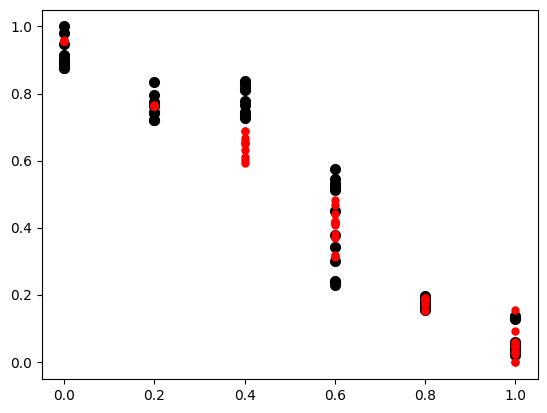

In [11]:
plt.pyplot.scatter(x_test["Type"], y_test, color="black", linewidth=2)
plt.pyplot.scatter(x_test["Type"], am_pred, color="red", linewidth=0.01)

Оценим качество модели с помощью метрик mean squared error и коэффициента детерминации 

In [12]:
from sklearn.metrics import mean_squared_error, r2_score 

In [13]:
# mean squared error
print("MSE: %.4f" % mean_squared_error(y_test, am_pred))
# коэффициент детерминации: чем ближе к 1, тем лучше, приемлимо если >0.5
print("R^2: %.4f" % r2_score(y_test, am_pred))

MSE: 0.0089
R^2: 0.9153


Теперь используем метод опорных векторов

In [14]:
from sklearn.svm import SVR

In [15]:
svr = SVR()
svr.fit(x_train, y_train)
am_pred = svr.predict(x_test)


/home/anna/notebooks/nb_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


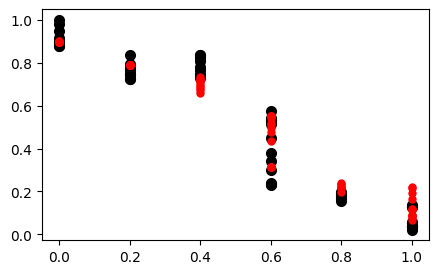

In [16]:
fig, ax = plt.pyplot.subplots(figsize=(5,3))
plt.pyplot.scatter(x_test["Type"], y_test, color="black", linewidth=2)
plt.pyplot.scatter(x_test["Type"], am_pred, color="red", linewidth=0.01)

In [17]:
# mean squared error
print("MSE: %.4f" % mean_squared_error(y_test, am_pred))
# коэффициент детерминации: чем ближе к 1, тем лучше, приемлимо если >0.5
print("R^2: %.4f" % r2_score(y_test, am_pred))

MSE: 0.0060
R^2: 0.9434


Согласно этим оценкам, модель имеет более высокое качество, чем предыдущая.

Перейдем к построению дерева решений.


In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
tree1 = DecisionTreeRegressor(max_depth=3)
tree2 = DecisionTreeRegressor(max_depth=5)
tree1.fit(x_train, y_train)
tree2.fit(x_train, y_train)

am_pred1 = tree1.predict(x_test)
am_pred2 = tree2.predict(x_test)

print("глубина = 3")
# mean squared error
print("MSE: %.4f" % mean_squared_error(y_test, am_pred1))
# коэффициент детерминации: чем ближе к 1, тем лучше, приемлимо если >0.5
print("R^2: %.4f" % r2_score(y_test, am_pred1))

print("глубина = 5")
# mean squared error
print("MSE: %.4f" % mean_squared_error(y_test, am_pred2))
# коэффициент детерминации: чем ближе к 1, тем лучше, приемлимо если >0.5
print("R^2: %.4f" % r2_score(y_test, am_pred2))


глубина = 3
MSE: 0.0021
R^2: 0.9800
глубина = 5
MSE: 0.0017
R^2: 0.9834


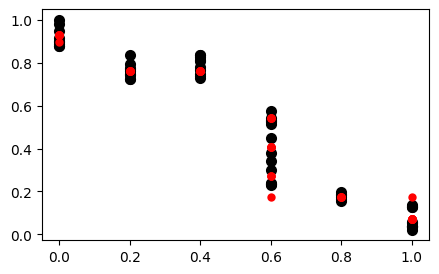

In [20]:
fig, ax = plt.pyplot.subplots(figsize=(5,3))
plt.pyplot.scatter(x_test["Type"], y_test, color="black", linewidth=2)
plt.pyplot.scatter(x_test["Type"], am_pred1, color="red", linewidth=0.01)

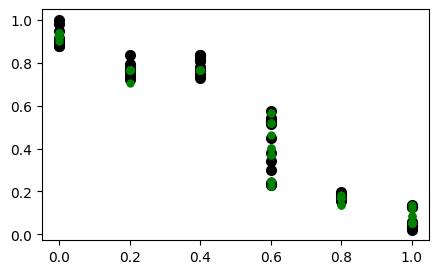

In [21]:
fig, ax = plt.pyplot.subplots(figsize=(5,3))
plt.pyplot.scatter(x_test["Type"], y_test, color="black", linewidth=2)
plt.pyplot.scatter(x_test["Type"], am_pred2, color="green", linewidth=0.01)

Наилучшие метрики имеет модель дерева решений с макс.глубиной = 5. Вид графика не позволяет сказать, приводит ли такая глубина к переобучению модели. 
Следующей по качеству является модель, использующая метод опорных векторов.


## Визуализация дерева

In [22]:
feature_names = list(stars)
feature_names.remove('A_M')
target_names = ['A_M']

In [23]:
print(feature_names)

['Temperature', 'L', 'R', 'Color', 'Spectral_Class', 'Type']


In [24]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.pyplot.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.pyplot.bar(ind, data)
    plt.pyplot.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.pyplot.text(a-0.05, b+0.01, str(round(b,3)))
    plt.pyplot.show()
    return labels, data

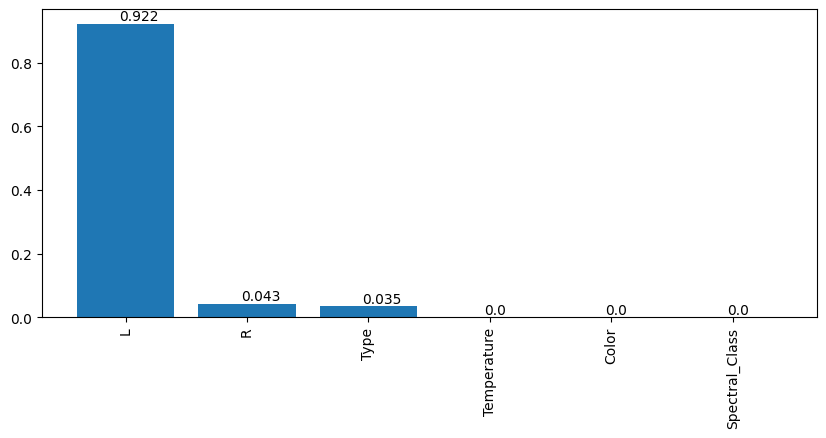

In [25]:
st_labels, st_data = draw_feature_importances(tree1, pd.DataFrame(data=stars, columns=feature_names))

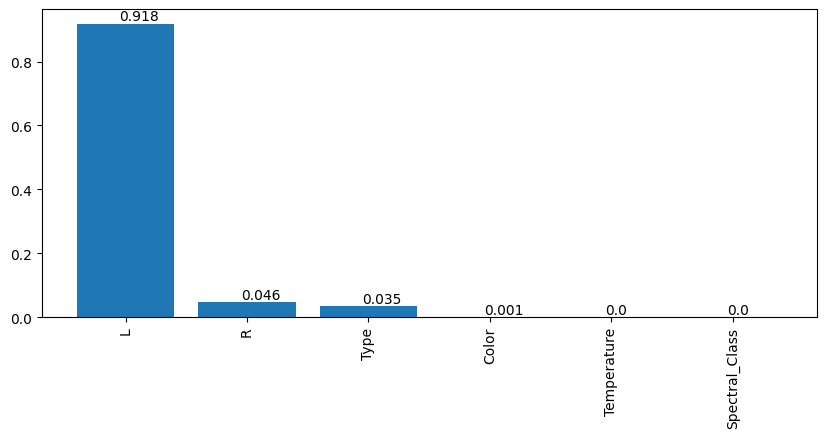

In [26]:
st_labels, st_data = draw_feature_importances(tree2, pd.DataFrame(data=stars, columns=feature_names))

In [27]:
from io import StringIO 
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

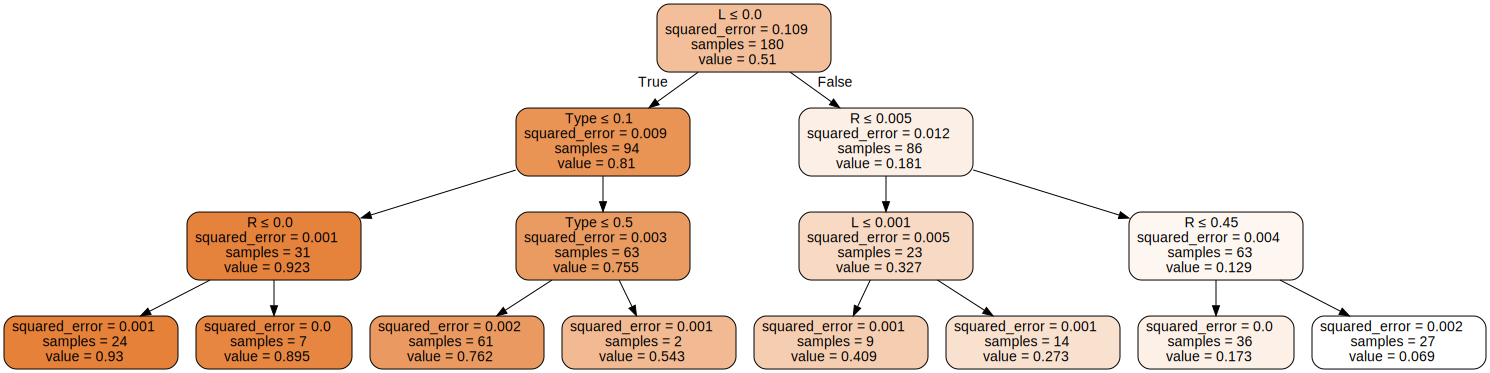

In [28]:
dot_data = export_graphviz(tree1, out_file=None, 
                           feature_names=feature_names, 
                           class_names=target_names, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph